In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Img = cv2.imread("photo.jpg")

In [3]:
img = cv2.cvtColor(Img,cv2.COLOR_BGR2GRAY)

In [4]:
def BitPlaneSlicing(img):
    lst = []
    w,h = img.shape

    for i in range(w):
        for j in range(h):
            lst.append(np.binary_repr(img[i][j],width=8))

    bit8 = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(w,h)
    bit7 = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(w,h)
    bit6 = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(w,h)
    bit5 = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(w,h)
    bit4 = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(w,h)
    bit3 = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(w,h)
    bit2 = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(w,h)
    bit1 = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(w,h)

    catImg1 = cv2.hconcat([bit8,bit7,bit6,bit5])
    catImg2 = cv2.hconcat([bit4,bit3,bit2,bit1])
    
    return catImg1 , catImg2

In [5]:
bitImg1 , bitImg2 = BitPlaneSlicing(img)

In [6]:
cv2.imshow("Bit plane slicing : ",bitImg1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [7]:
cv2.imshow("Bit plane slicing : ",bitImg2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
def grayLevelSlicing(img):
    w,h = img.shape
    t1 = 80
    t2 = 160

    newImg = np.zeros((w,h),dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            if(img[i,j] >= 80 and img[i,j] <= 160):
                newImg[i,j] = 255
            else:
                newImg[i,j] = img[i,j]

    return newImg

In [9]:
grayImg = grayLevelSlicing(img)
cv2.imshow("Gray level slicing : ",grayImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
def histogram(img):
    w,h = img.shape

    vals = np.zeros(256)
    for i in range(w):
        for j in range(h):
            vals[img[i,j]] += 1

    return vals

In [11]:
vals = histogram(img)
y = list(range(256))

<BarContainer object of 256 artists>

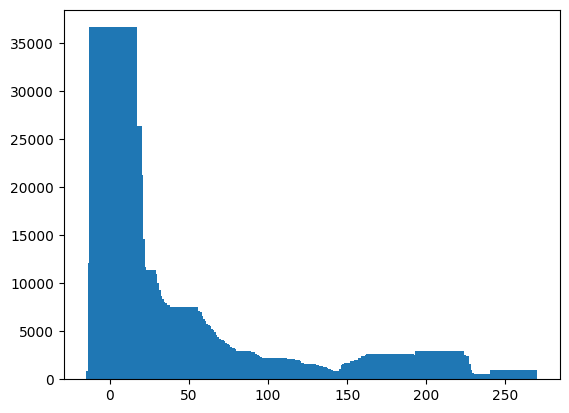

In [12]:
plt.bar(y,vals,30)

In [13]:
def histogramEqualized(img):
    w,h = img.shape

    vals = {}
    for i in range(w):
        for j in range(h):
            val = img[i][j]
            vals[val] = vals.get(val,0) + 1

    prob = np.array(list(vals.values()),dtype=np.float64)
    total = w * h
    prob /= total

    return dict(zip(vals.keys(),prob))

In [14]:
img

array([[207, 207, 207, ..., 176, 177, 178],
       [207, 207, 207, ..., 176, 177, 178],
       [207, 207, 207, ..., 177, 178, 178],
       ...,
       [  2,   2,   2, ...,  57,  58,  58],
       [  2,   2,   2, ...,  56,  57,  57],
       [  2,   2,   2, ...,  55,  55,  56]], dtype=uint8)

In [15]:
prob = histogramEqualized(img)

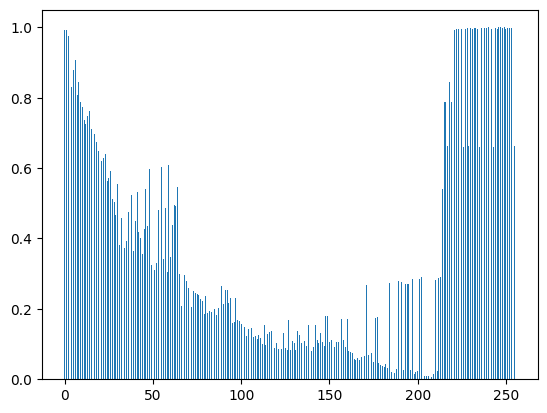

In [16]:
p = list(prob.values())
cdf = [p[0]]
for i in range(1,len(p)):
    cdf.append(p[i] + cdf[i-1])

plt.bar(prob.keys(),cdf,width=0.5)
plt.show()